# Scraping data


In [146]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [129]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
r = requests.get(url)
html_content = r.content
# print(htmlContent)

In [130]:
soup = BeautifulSoup(html_content,'html.parser')
# print(soup.prettify)

In [131]:
title = soup.title
print(title)
# print(type(soup))
# print(type(title.string))
# type(title)

<title>Election Commission of India</title>


In [132]:
anchors= soup.find_all('a')
all_links = set()
# print(anchors)

In [133]:
print(soup.find('table'))

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [113]:
for link in anchors:
    href= link.get('href')
    if href and href!='#':
        all_links.add(href)

In [134]:
data = []
for row in soup.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    if len(cols) == 4 and cols[0].text.strip() != 'Total':
        party = cols[0].text.strip()
        won = cols[1].text.strip()
        leading = cols[2].text.strip()
        total = cols[3].text.strip()
        data.append([party, won, leading, total])

print(f"Extracted data: {data}")

Extracted data: [['Party', 'Won', 'Leading', 'Total'], ['Bharatiya Janata Party - BJP', '240', '0', '240'], ['Indian National Congress - INC', '99', '0', '99'], ['Samajwadi Party - SP', '37', '0', '37'], ['All India Trinamool Congress - AITC', '29', '0', '29'], ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'], ['Telugu Desam - TDP', '16', '0', '16'], ['Janata Dal  (United) - JD(U)', '12', '0', '12'], ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'], ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'], ['Shiv Sena - SHS', '7', '0', '7'], ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'], ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'], ['Rashtriya Janata Dal - RJD', '4', '0', '4'], ['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4'], ['Indian Union Muslim League - IUML', '3', '0', '3'], ['Aam Aadmi Party - AAAP', '3', '0', '3'], ['Jharkhand Mukti Morcha - JMM', '3', '0', '3'], ['Janasena Party - JnP', '2',

In [135]:
# Save data to CSV
# with open('election_results.csv', 'w', newline='', encoding='utf-8') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Party', 'Won', 'Leading', 'Total'])
#     writer.writerows(data)

In [164]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
r = requests.get(url)
html_content = r.content
# HTML content (same as before)
# HTML content (same as before)


# Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract data
data = []
for row in soup.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    if len(cols) == 4 and cols[0].text.strip() != 'Total':
        party = cols[0].text.strip()
        won = cols[1].text.strip()
        leading = cols[2].text.strip()
        total = cols[3].text.strip()
        data.append([party, won, leading, total])

print(f"Extracted data: {data}")  # Debug print

# Save data to CSV
# with open('election_results.csv', 'w', newline='', encoding='utf-8') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Party', 'Won', 'Leading', 'Total'])
#     writer.writerows(data)

# Read CSV into pandas DataFrame for analysis
try:
    df = pd.read_csv('election_results.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try with 'ISO-8859-1' encoding
    df = pd.read_csv('election_results.csv', encoding='ISO-8859-1')

print(f"DataFrame shape: {df.shape}")  # Debug print
print(f"DataFrame contents:\n{df}")  # Debug print

# Remove any potential extra header row
if df.iloc[0].equals(df.columns):
    df = df.iloc[1:].reset_index(drop=True)

# Ensure numeric columns are of type int
for col in ['Won', 'Leading', 'Total']:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

df = df.dropna()  # Remove any rows with NaN values
print(f"DataFrame after type conversion and NaN removal:\n{df}")  # Debug print

# Derive insights
plt.style.use('seaborn')
sns.set_palette("deep")

# 1. Bar chart of total seats won by each party
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Party', y='Total', data=df)
plt.title('Total Seats Won by Each Party', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Total Seats', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(df['Total']):
    ax.text(i, v, str(int(v)), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('total_seats_by_party.png')
plt.close()

insights = []

if df.empty:
    insights.append("The DataFrame is empty. No insights can be derived.")
else:
    # 1. Total number of parties
    insights.append(f"1. Total number of parties: {len(df)}")

    # 2. Party with the most seats
    most_seats_party = df.loc[df['Total'].idxmax(), 'Party']
    most_seats = df['Total'].max()
    insights.append(f"2. Party with the most seats: {most_seats_party} ({most_seats} seats)")

    # 3. Party with the least seats
    least_seats_party = df.loc[df['Total'].idxmin(), 'Party']
    least_seats = df['Total'].min()
    insights.append(f"3. Party with the least seats: {least_seats_party} ({least_seats} seats)")

    # 4. Total seats won
    total_seats_won = df['Won'].sum()
    insights.append(f"4. Total seats won: {total_seats_won}")

    # 5. Percentage of seats won by the leading party
    leading_party_percentage = (most_seats / total_seats_won) * 100
    insights.append(f"5. Percentage of seats won by the leading party: {leading_party_percentage:.2f}%")

    # Add more insights here...

# Print insights
print("\nInsights:")
for insight in insights:
    print(insight)

Extracted data: [['Party', 'Won', 'Leading', 'Total'], ['Bharatiya Janata Party - BJP', '240', '0', '240'], ['Indian National Congress - INC', '99', '0', '99'], ['Samajwadi Party - SP', '37', '0', '37'], ['All India Trinamool Congress - AITC', '29', '0', '29'], ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'], ['Telugu Desam - TDP', '16', '0', '16'], ['Janata Dal  (United) - JD(U)', '12', '0', '12'], ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'], ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'], ['Shiv Sena - SHS', '7', '0', '7'], ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'], ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'], ['Rashtriya Janata Dal - RJD', '4', '0', '4'], ['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4'], ['Indian Union Muslim League - IUML', '3', '0', '3'], ['Aam Aadmi Party - AAAP', '3', '0', '3'], ['Jharkhand Mukti Morcha - JMM', '3', '0', '3'], ['Janasena Party - JnP', '2',

AttributeError: Can only use .str accessor with string values!

In [136]:
try:
    df = pd.read_csv('election_results.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('election_results.csv', encoding='ISO-8859-1')
print(f"DataFrame shape: {df.shape}")  
print(f"DataFrame contents:\n{df}") 

DataFrame shape: (43, 4)
DataFrame contents:
                                                Party  Won  Leading  Total
0                                               Party  Won  Leading  Total
1                        Bharatiya Janata Party - BJP  240        0    240
2                      Indian National Congress - INC   99        0     99
3                                Samajwadi Party - SP   37        0     37
4                 All India Trinamool Congress - AITC   29        0     29
5                     Dravida Munnetra Kazhagam - DMK   22        0     22
6                                  Telugu Desam - TDP   16        0     16
7                        Janata Dal  (United) - JD(U)   12        0     12
8      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9        0      9
9   Nationalist Congress Party – Sharadchandra Paw...    8        0      8
10                                    Shiv Sena - SHS    7        0      7
11             Lok Janshakti Party(Ram Vilas) - LJPRV  

In [165]:
if df.iloc[0].equals(df.columns):
    df = df.iloc[1:].reset_index(drop=True)
    
for col in ['Won', 'Leading', 'Total']:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

df = df.dropna() 
print(f"DataFrame after type conversion and NaN removal:\n{df}")  

AttributeError: Can only use .str accessor with string values!

In [166]:
plt.style.use('seaborn-darkgrid')
blue_palette = sns.color_palette("Blues", n_colors=len(df))

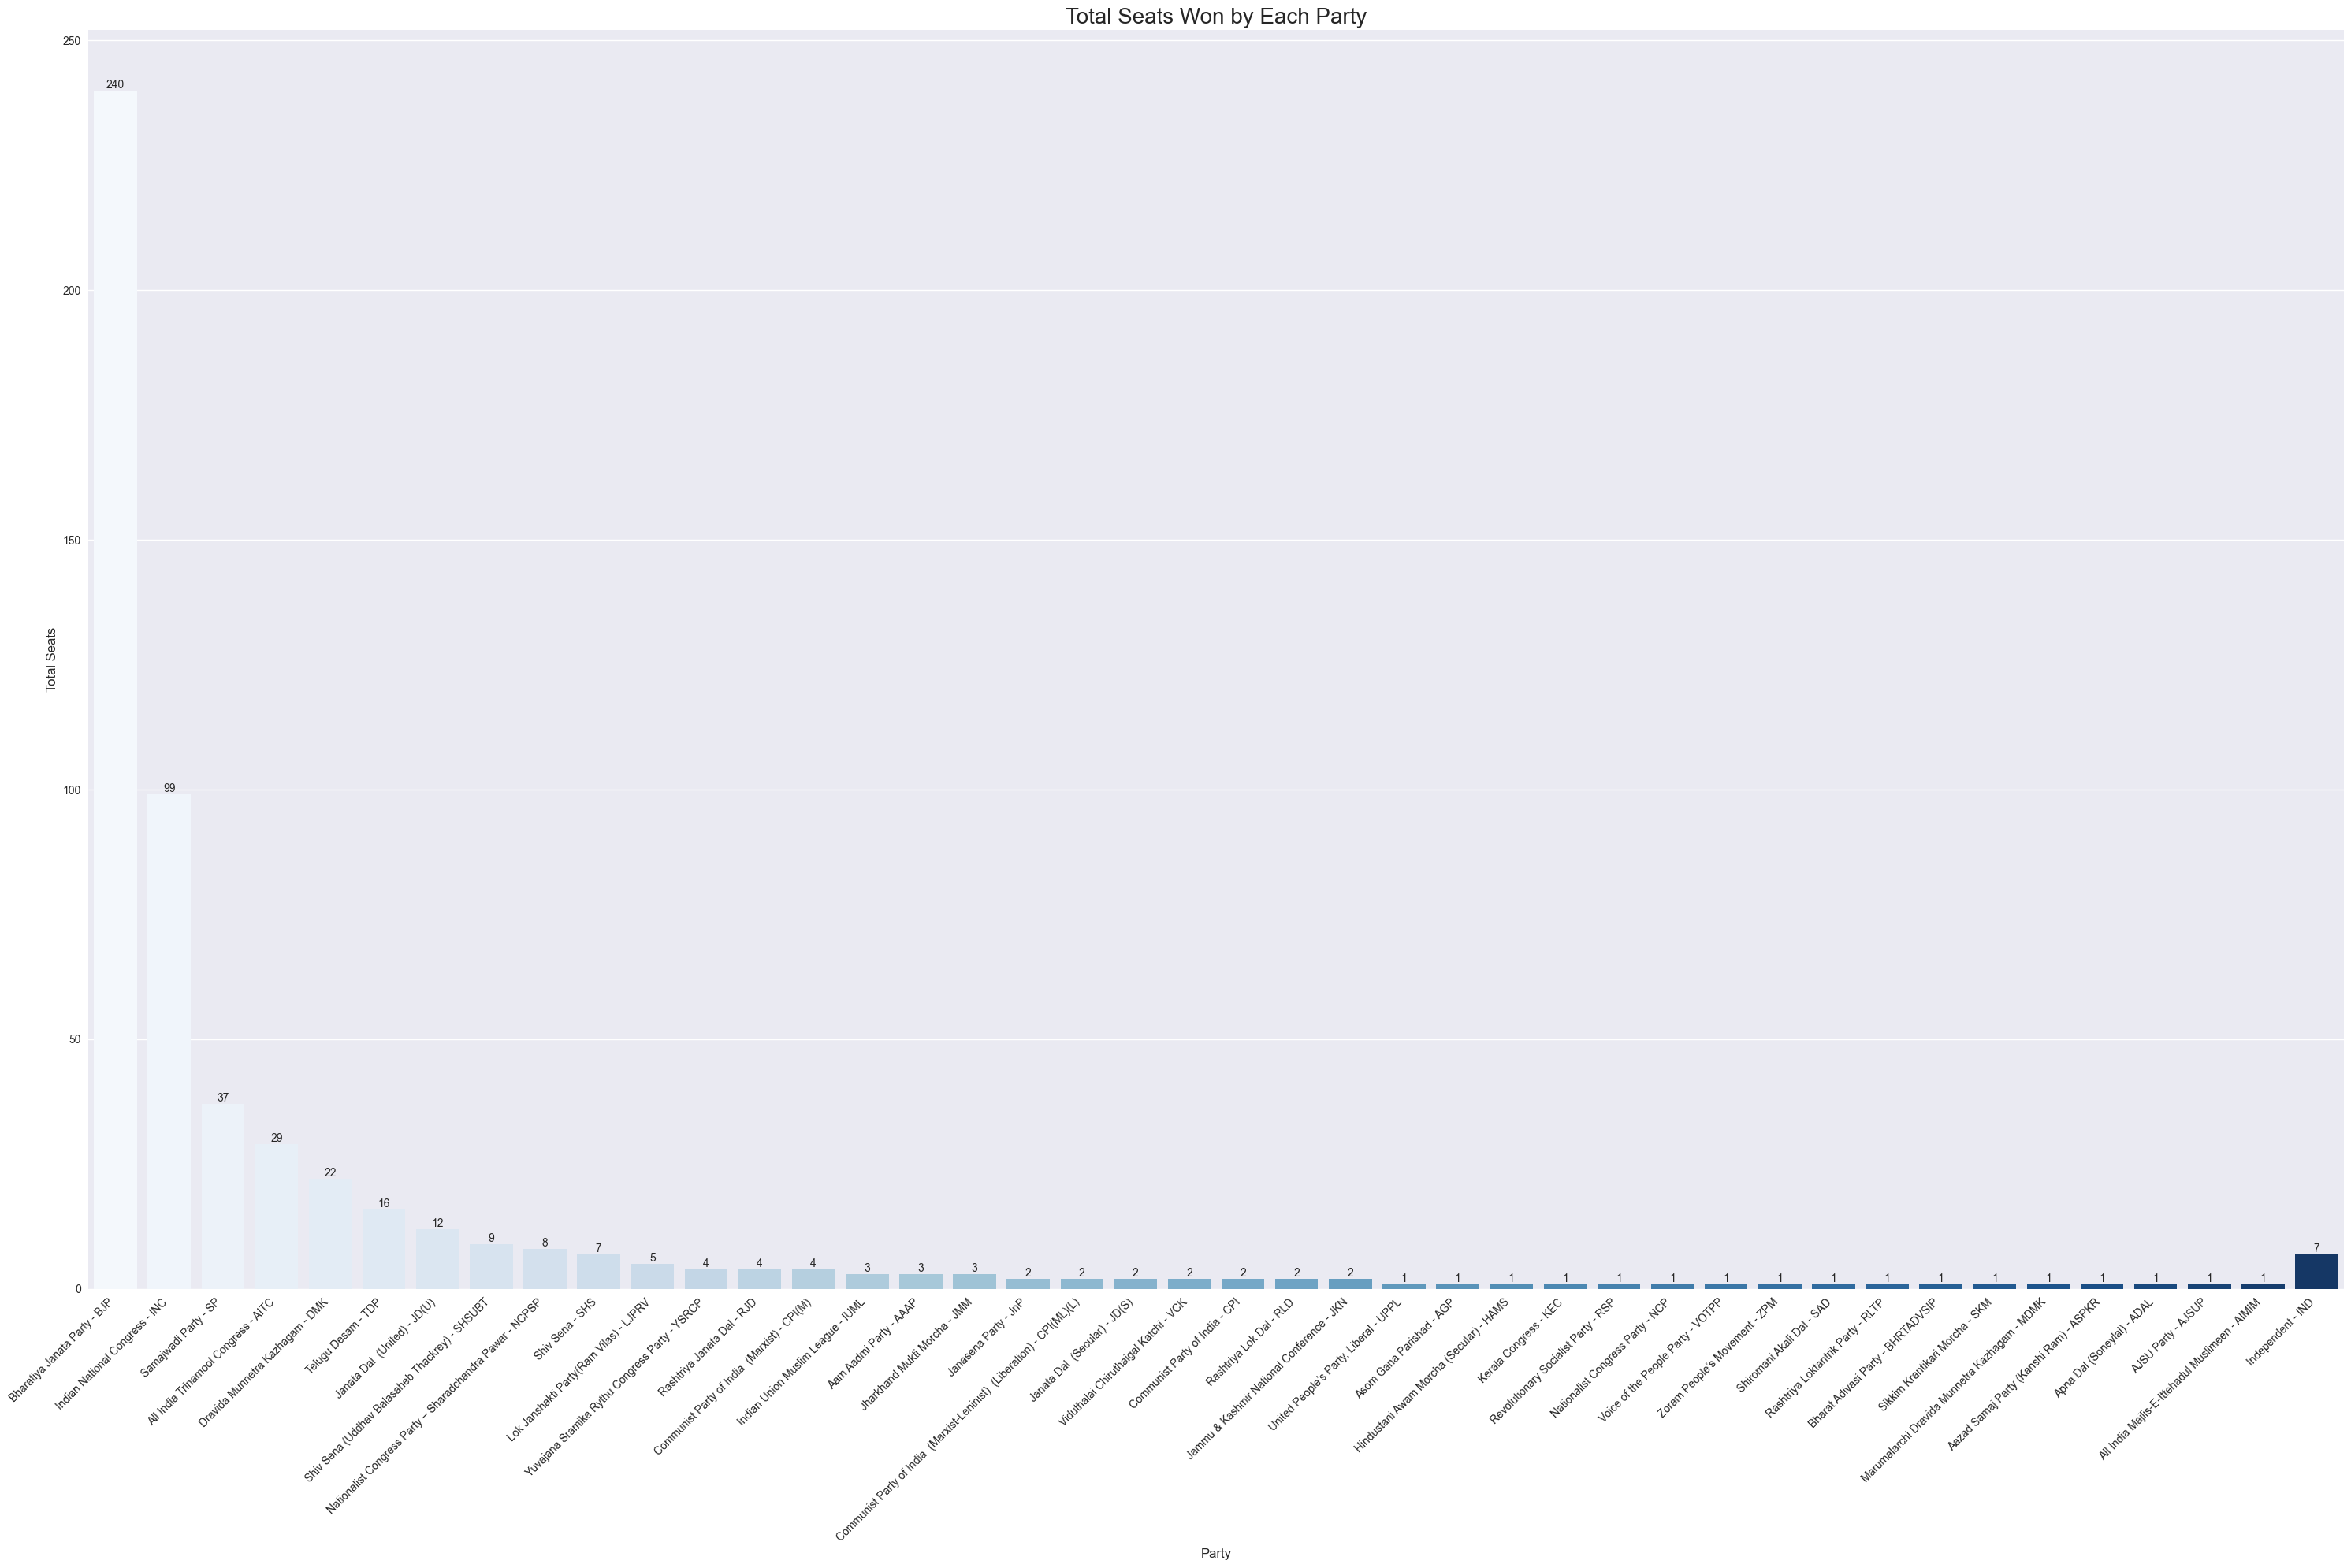

In [167]:
# 1. Bar chart of total seats won by each party
plt.figure(figsize=(30, 20))
ax = sns.barplot(x='Party', y='Total', data=df, palette=blue_palette)
plt.title('Total Seats Won by Each Party', fontsize=20)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Total Seats', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(df['Total']):
    ax.text(i, v, str(int(v)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

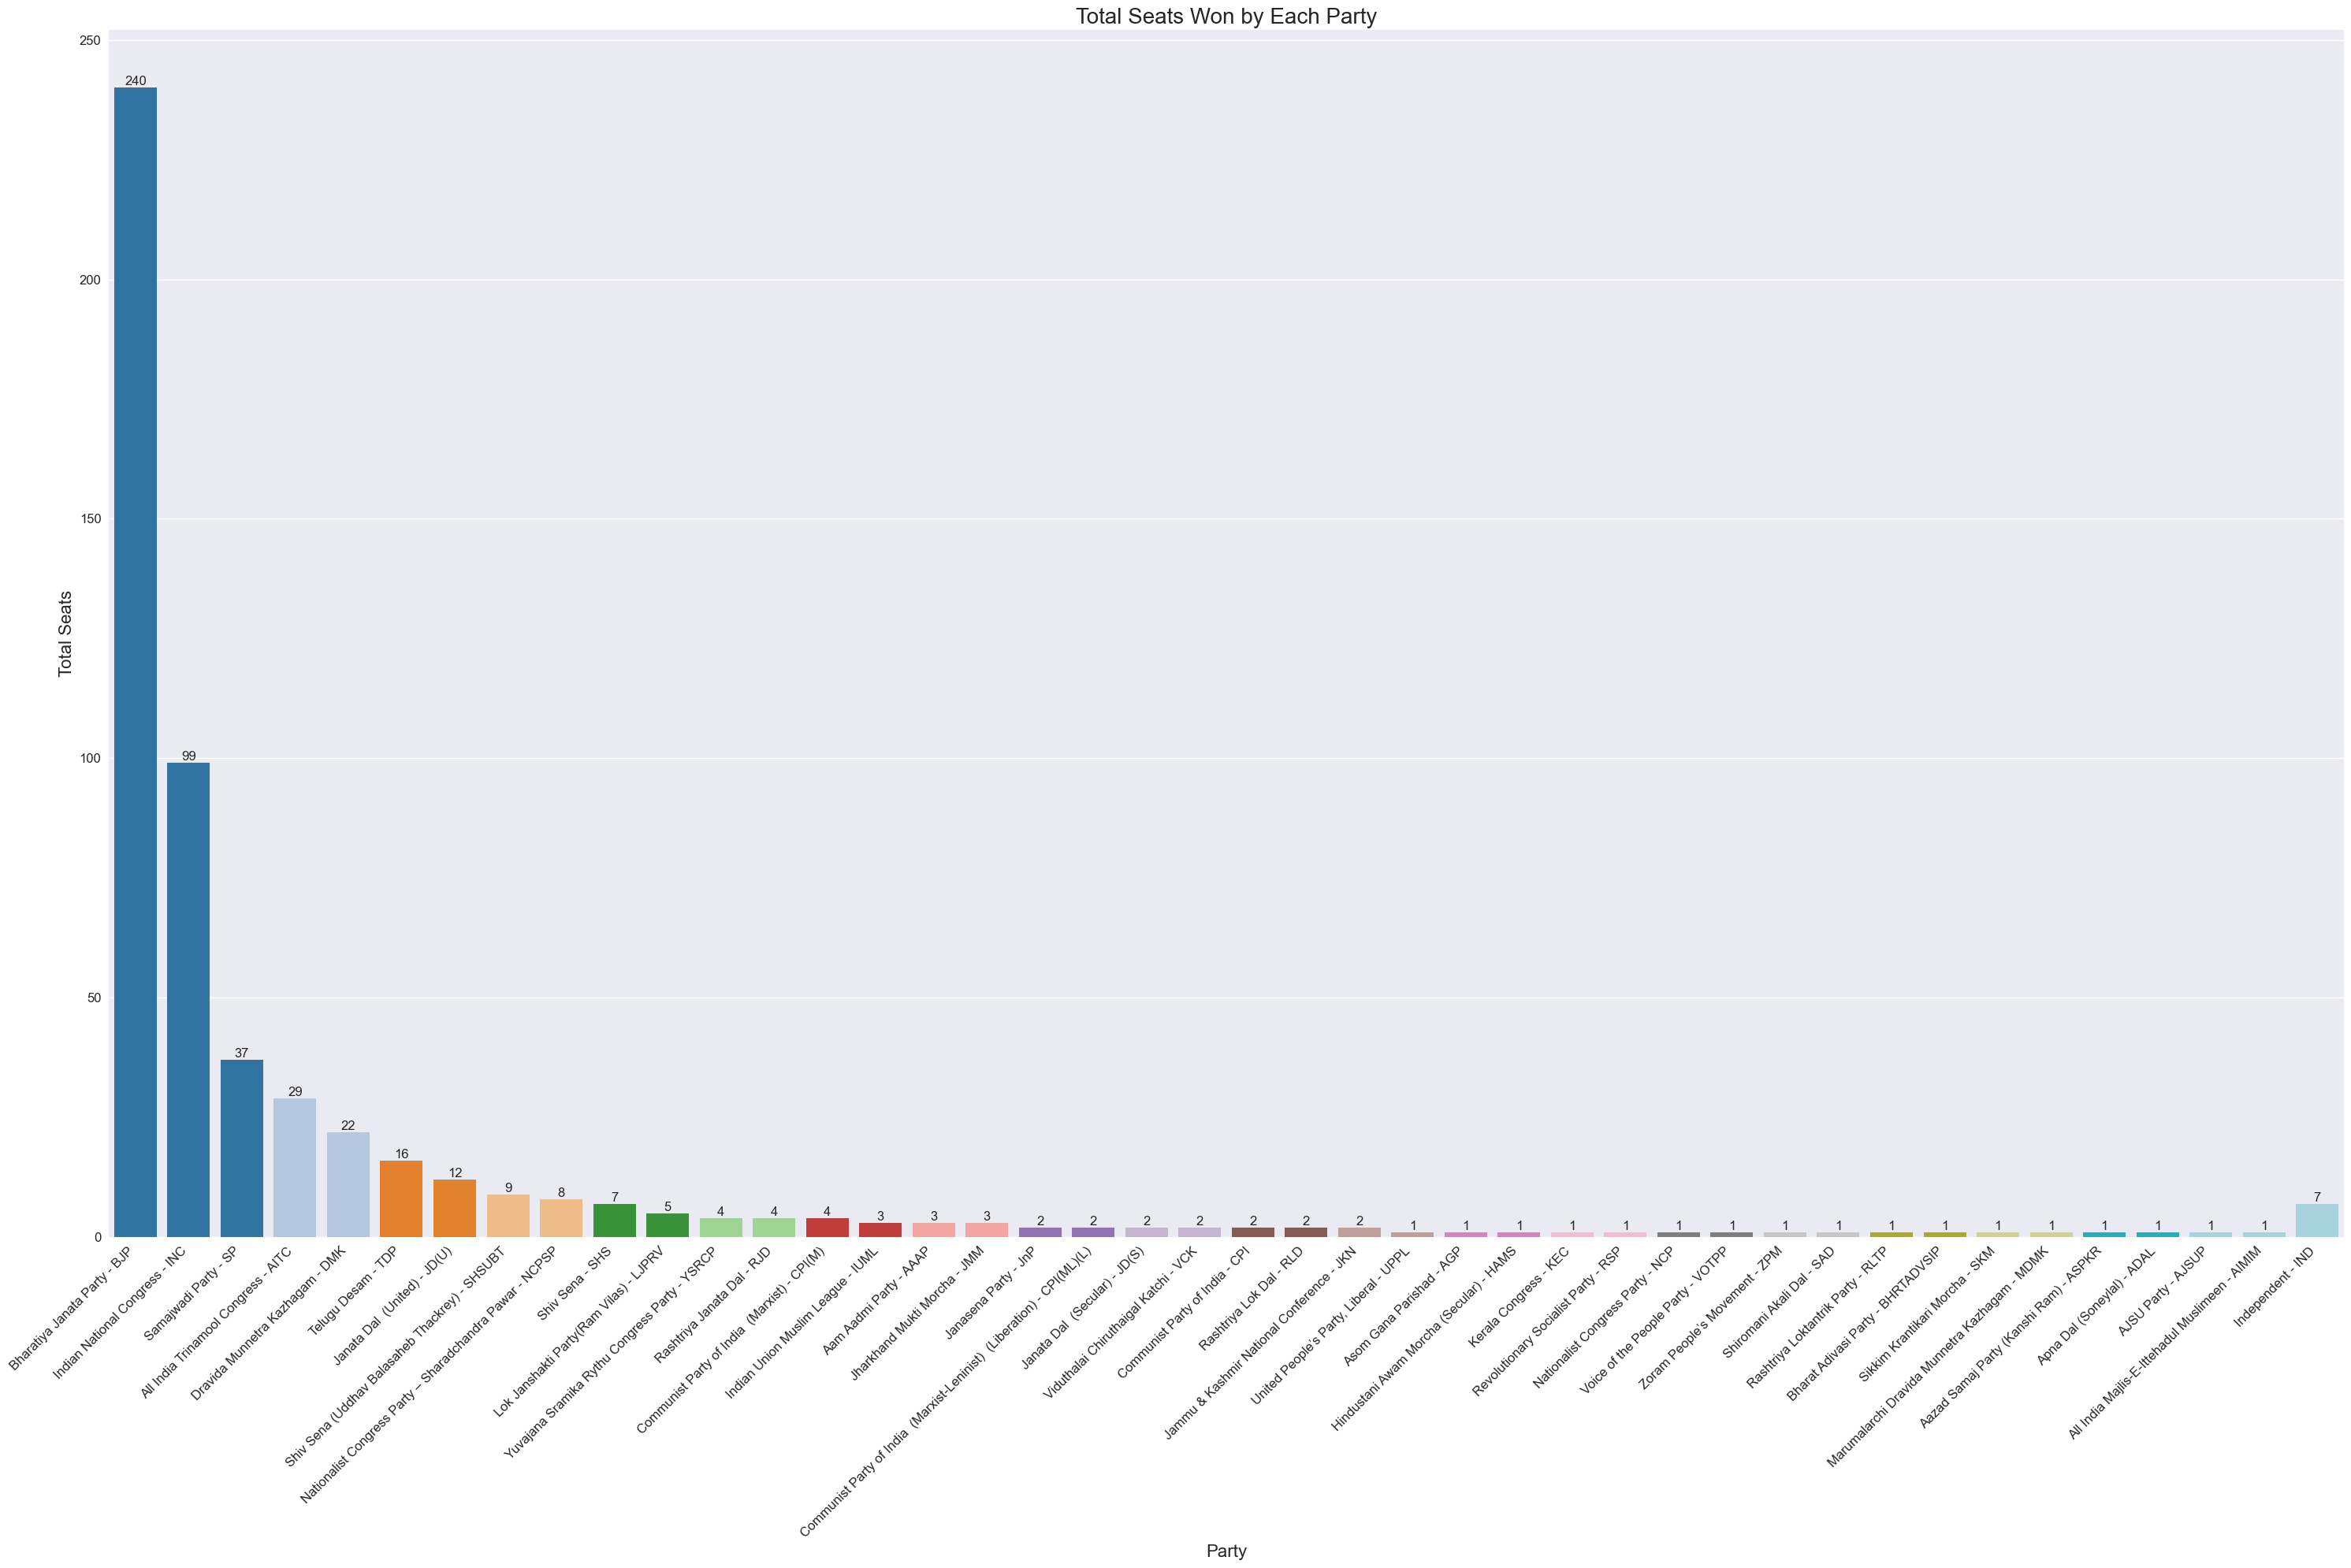

In [171]:
colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df)))
custom_palette = sns.color_palette(colors)

# Increase the default figure size
plt.rcParams['figure.figsize'] = [30, 20]

# 1. Bar chart of total seats won by each party
plt.figure()
ax = sns.barplot(x='Party', y='Total', data=df, palette=custom_palette)
plt.title('Total Seats Won by Each Party', fontsize=20)
plt.xlabel('Party', fontsize=16)
plt.ylabel('Total Seats', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(df['Total']):
    ax.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

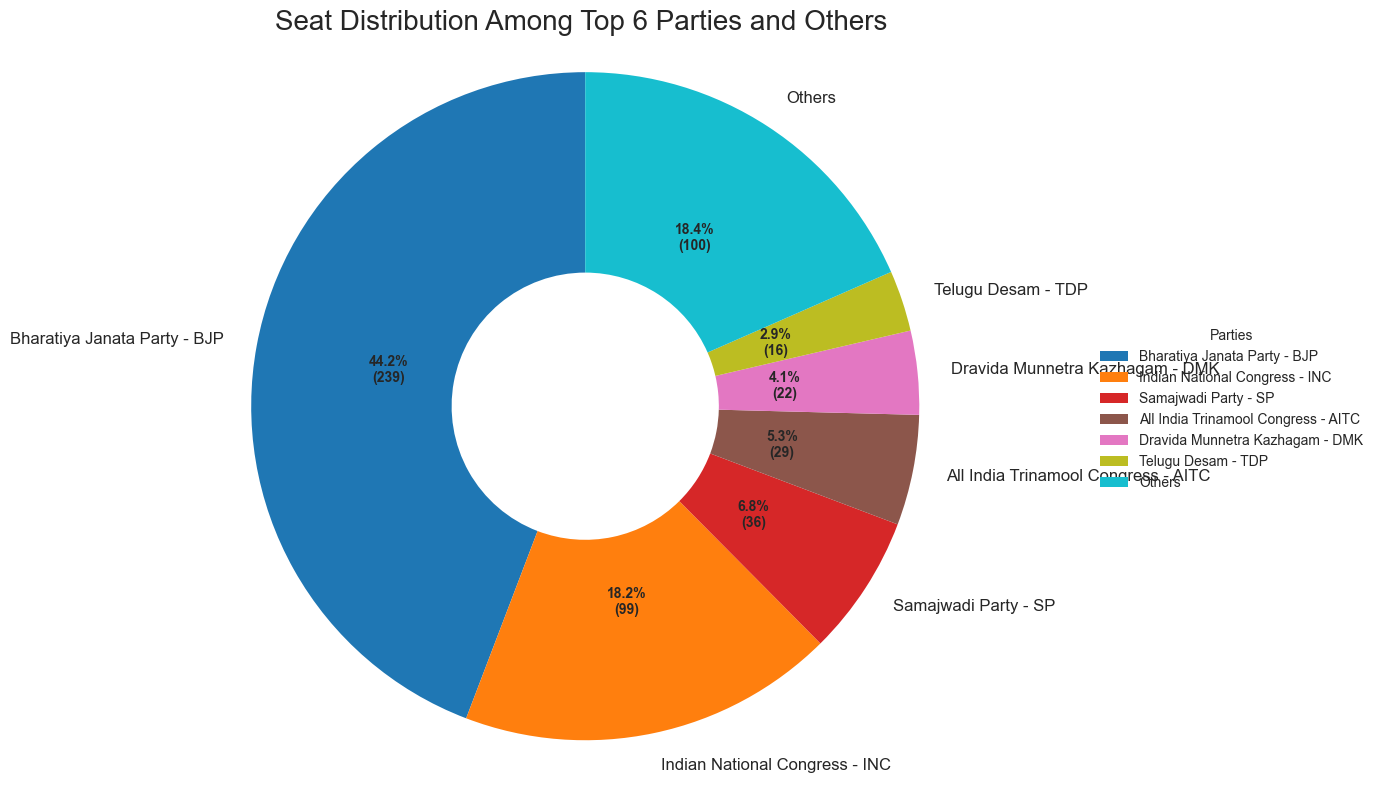

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming we have the DataFrame 'df' with columns: 'Party', 'Won', 'Leading', 'Total'

# Sort the DataFrame by Total seats in descending order
df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)

# Separate top 6 parties and sum the rest
top_6 = df_sorted.head(6)
others = pd.DataFrame({
    'Party': ['Others'],
    'Total': [df_sorted.iloc[6:]['Total'].sum()]
})

# Combine top 6 and others
pie_data = pd.concat([top_6, others]).reset_index(drop=True)

# Set up the plotting style
plt.style.use('seaborn-darkgrid')

# Create a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(pie_data)))
custom_palette = sns.color_palette(colors)

# Increase the figure size
plt.figure(figsize=[12, 8])

# Create the pie chart
wedges, texts, autotexts = plt.pie(pie_data['Total'], 
                                   labels=pie_data['Party'], 
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(pie_data["Total"]))})' if pct > 2 else '',
                                   startangle=90, 
                                   colors=custom_palette,
                                   wedgeprops=dict(width=0.6))  # Donut chart

plt.title('Seat Distribution Among Top 6 Parties and Others', fontsize=20)
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

# Add legend
plt.legend(wedges, pie_data['Party'],
           title="Parties",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

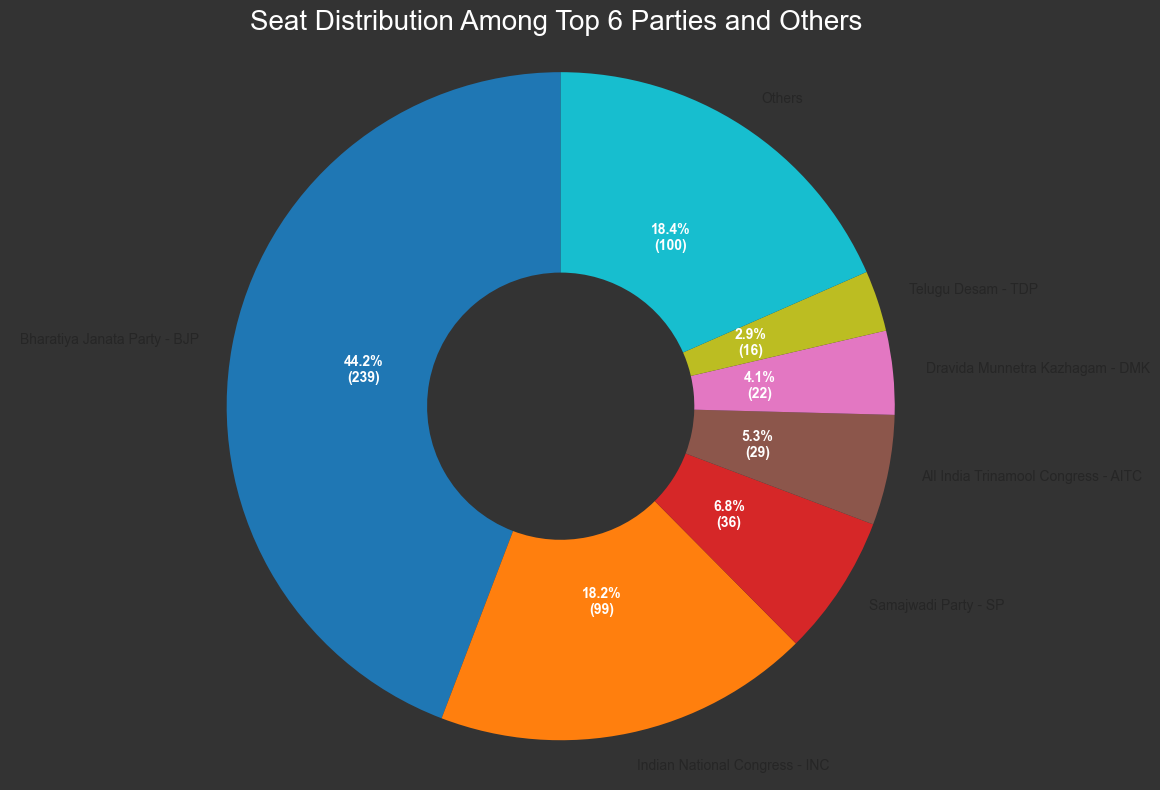

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming we have the DataFrame 'df' with columns: 'Party', 'Won', 'Leading', 'Total'

# Sort the DataFrame by Total seats in descending order
df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)

# Separate top 6 parties and sum the rest
top_6 = df_sorted.head(6)
others = pd.DataFrame({
    'Party': ['Others'],
    'Total': [df_sorted.iloc[6:]['Total'].sum()]
})

# Combine top 6 and others
pie_data = pd.concat([top_6, others]).reset_index(drop=True)

# Set up the plotting style
plt.style.use('seaborn-darkgrid')

# Create a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(pie_data)))
custom_palette = sns.color_palette(colors)

# Increase the figure size
plt.figure(figsize=[12, 8])

# Create the pie chart
wedges, texts, autotexts = plt.pie(pie_data['Total'], 
                                   labels=pie_data['Party'],  # Set labels to 'Party'
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(pie_data["Total"]))})',
                                   startangle=90, 
                                   colors=custom_palette,
                                   wedgeprops=dict(width=0.6))  # Donut chart

plt.title('Seat Distribution Among Top 6 Parties and Others', fontsize=20, color='white')
plt.setp(autotexts, size=10, weight="bold", color='white')  # Set text color to white

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.3, fc='#333333')  # Dark background for contrast
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

# Set the figure background to a dark color for better contrast with white text
fig.patch.set_facecolor('#333333')

plt.show()


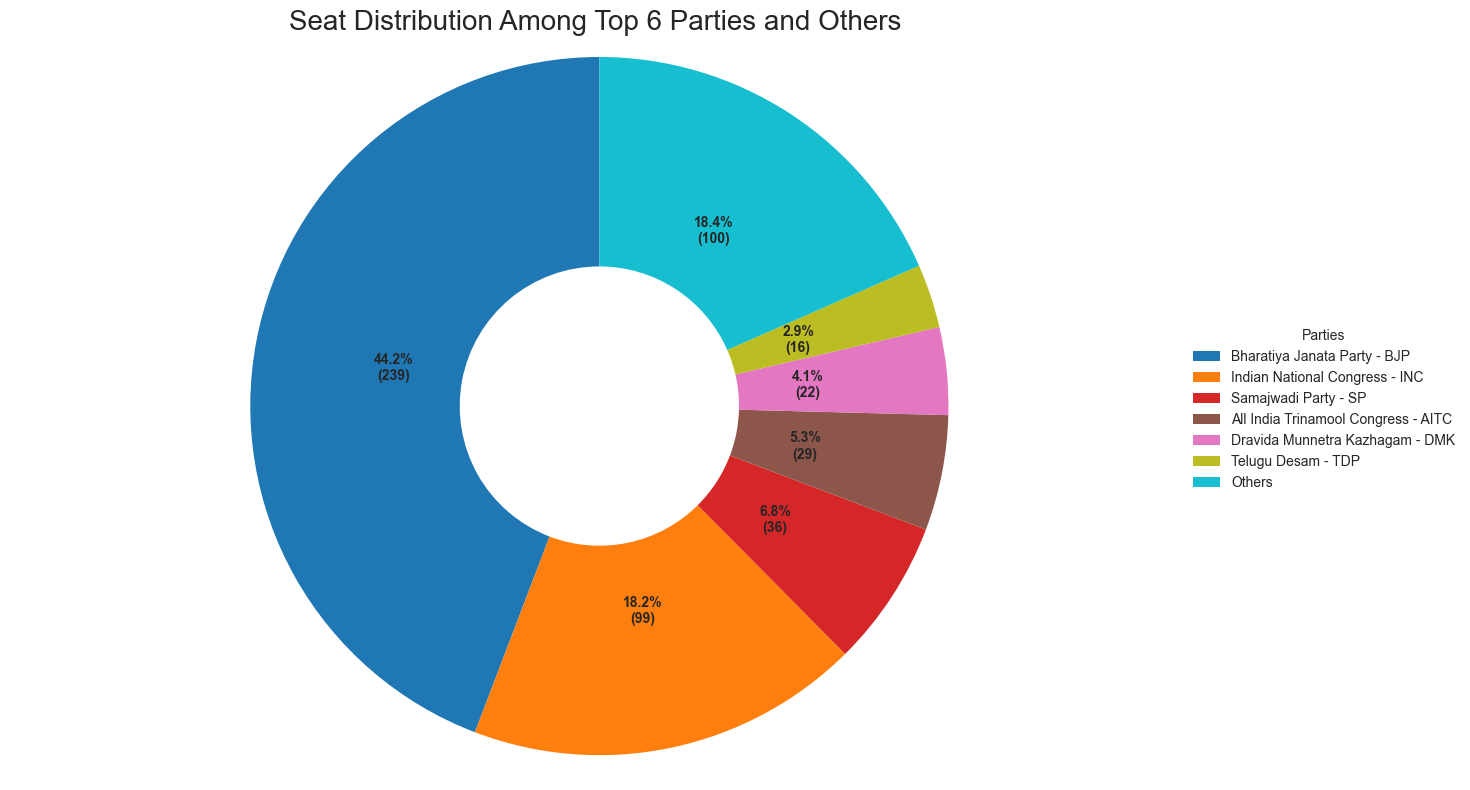

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming we have the DataFrame 'df' with columns: 'Party', 'Won', 'Leading', 'Total'

# Sort the DataFrame by Total seats in descending order
df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)

# Separate top 6 parties and sum the rest
top_6 = df_sorted.head(6)
others = pd.DataFrame({
    'Party': ['Others'],
    'Total': [df_sorted.iloc[6:]['Total'].sum()]
})

# Combine top 6 and others
pie_data = pd.concat([top_6, others]).reset_index(drop=True)

# Set up the plotting style
plt.style.use('seaborn-darkgrid')

# Create a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(pie_data)))
custom_palette = sns.color_palette(colors)

# Increase the figure size
plt.figure(figsize=[12, 8])

# Create the pie chart
wedges, texts, autotexts = plt.pie(pie_data['Total'], 
                                   labels=None,  # Remove labels
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(pie_data["Total"]))})' if pct > 2 else '',
                                   startangle=90, 
                                   colors=custom_palette,
                                   wedgeprops=dict(width=0.6))  # Donut chart

plt.title('Seat Distribution Among Top 6 Parties and Others', fontsize=20)

# Set properties of text inside the pie chart
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

# Add legend outside the pie chart
plt.legend(wedges, pie_data['Party'],
           title="Parties",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


<Figure size 3000x2000 with 0 Axes>

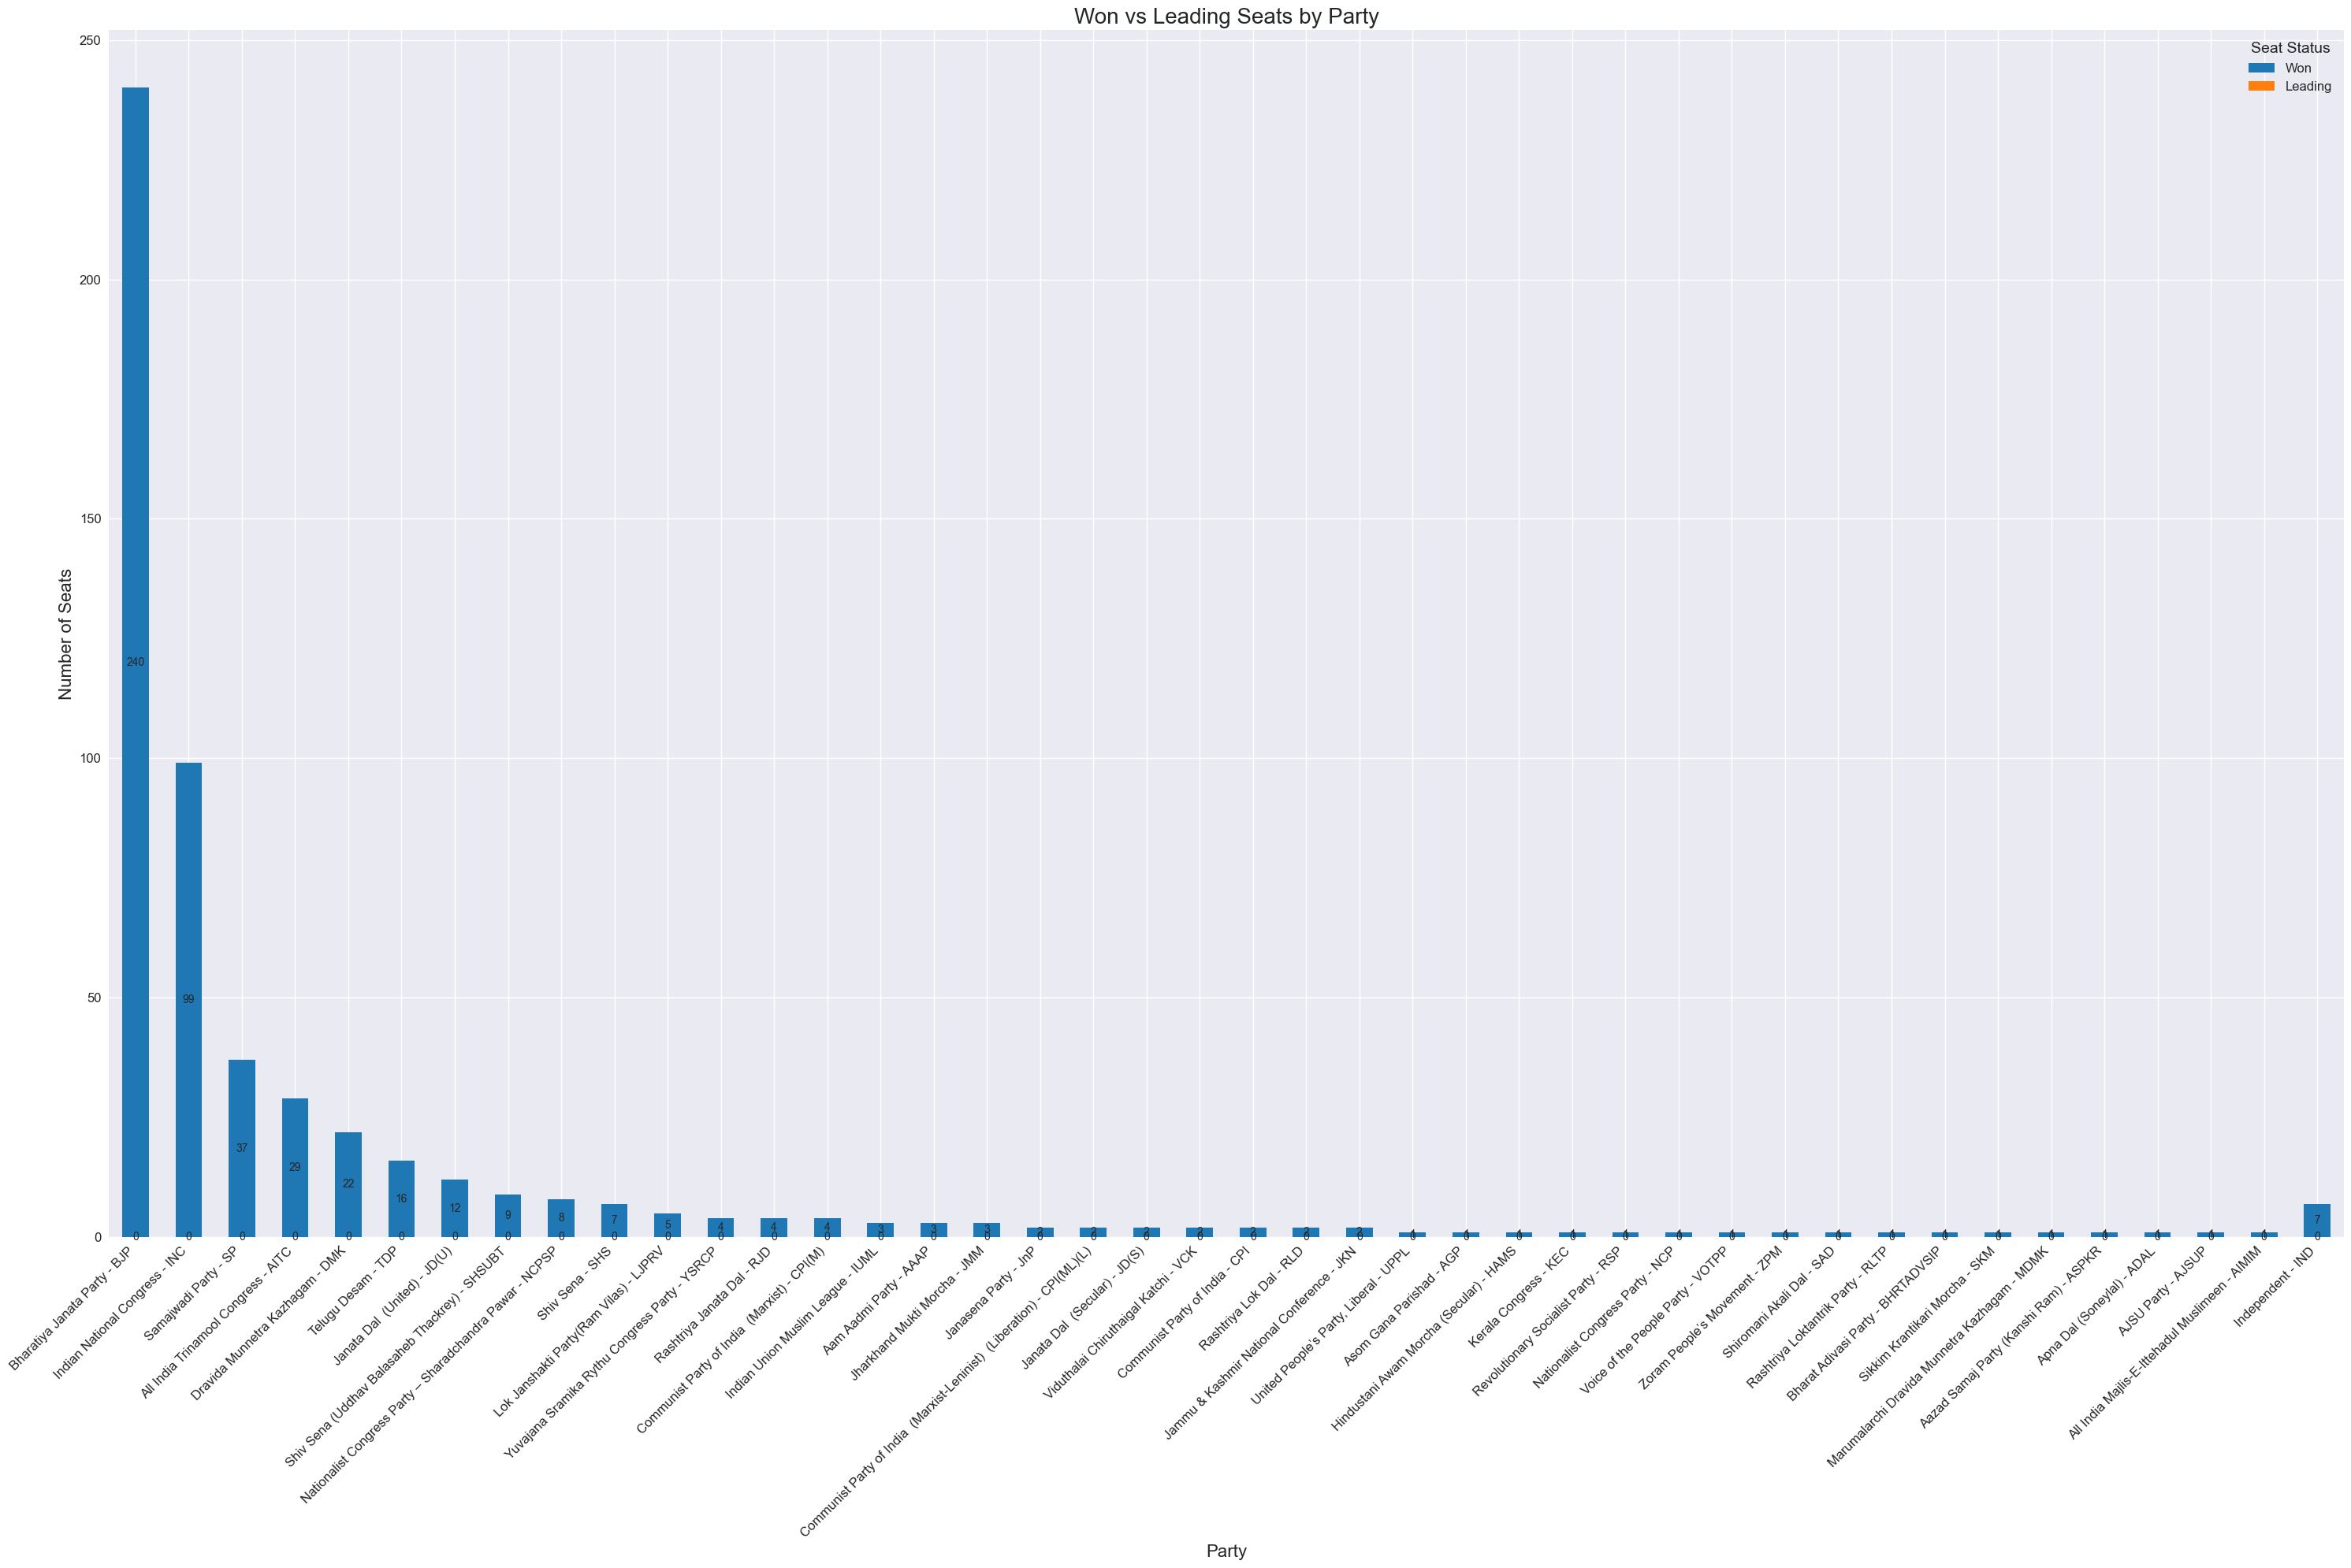

In [175]:
# 3. Stacked bar chart of won vs leading seats
plt.figure()
df_stacked = df[['Party', 'Won', 'Leading']].set_index('Party')
ax = df_stacked.plot(kind='bar', stacked=True, color=custom_palette[:2])
plt.title('Won vs Leading Seats by Party', fontsize=20)
plt.xlabel('Party', fontsize=16)
plt.ylabel('Number of Seats', fontsize=16)
plt.legend(title='Seat Status', fontsize=12, title_fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=10)
plt.tight_layout()
plt.show()

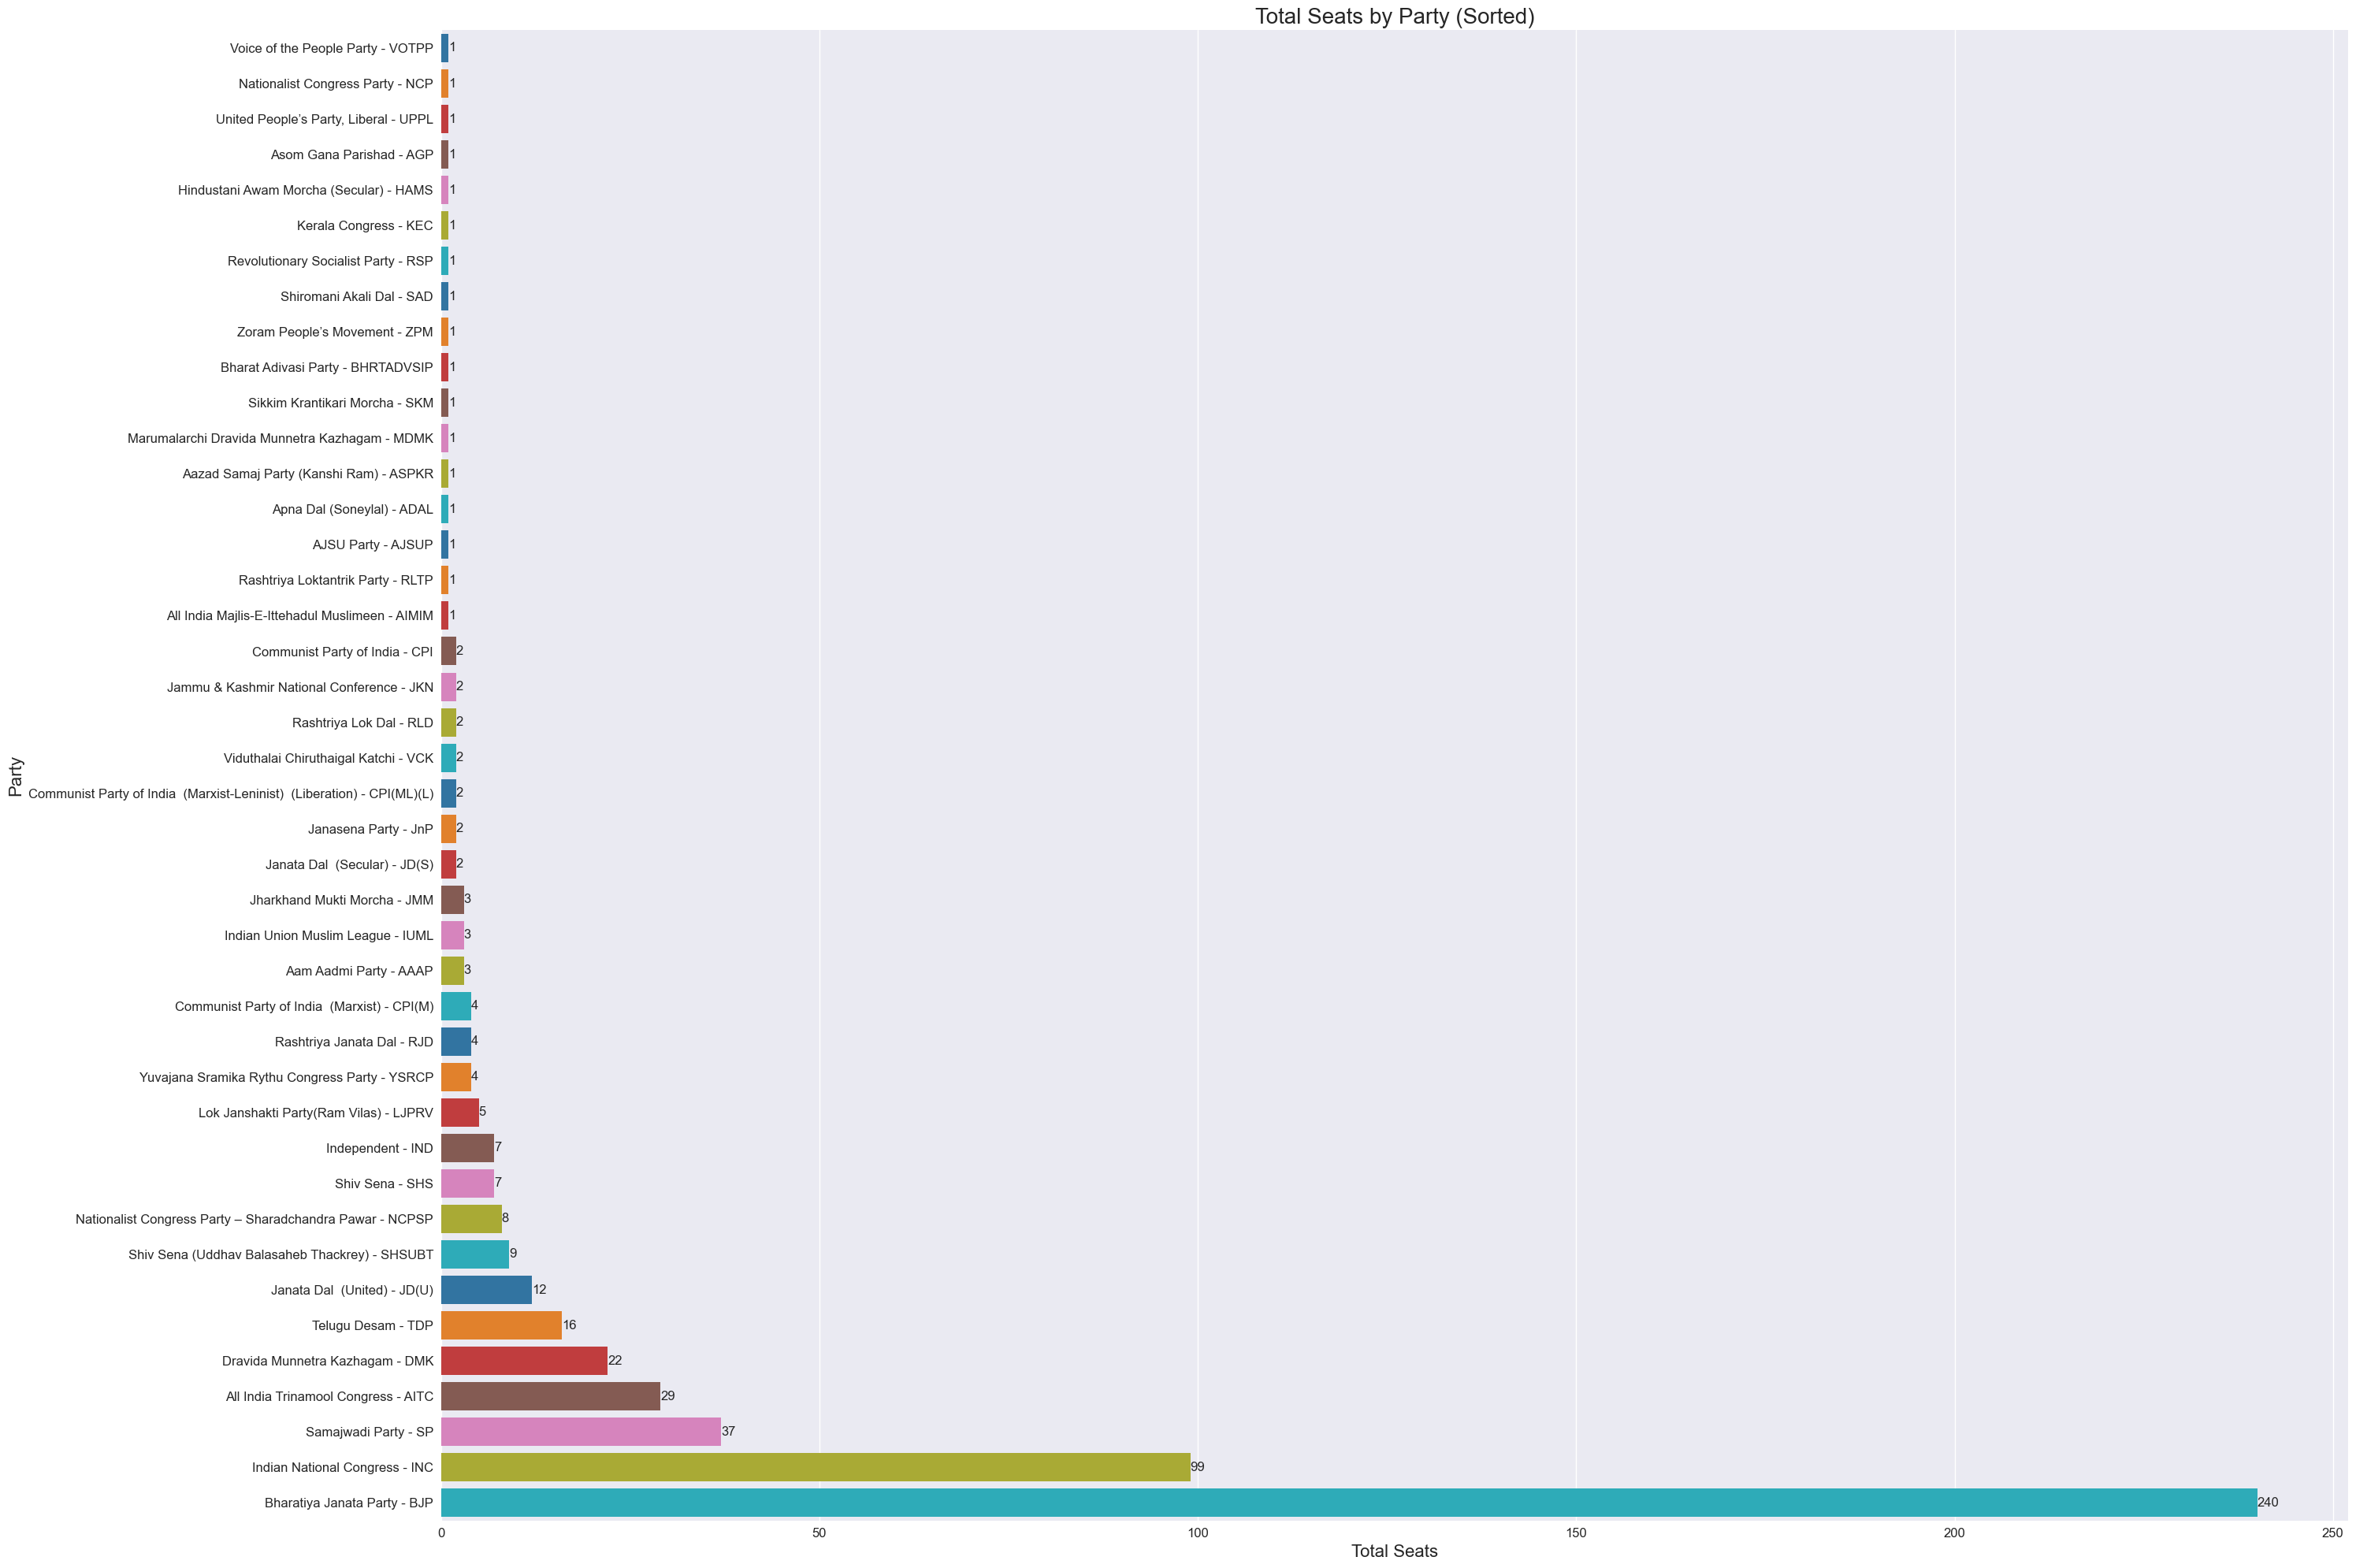

In [176]:
plt.figure()
df_sorted = df.sort_values('Total', ascending=True)
ax = sns.barplot(x='Total', y='Party', data=df_sorted, palette=custom_palette)
plt.title('Total Seats by Party (Sorted)', fontsize=20)
plt.xlabel('Total Seats', fontsize=16)
plt.ylabel('Party', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(df_sorted['Total']):
    ax.text(v, i, str(int(v)), va='center', fontsize=12)
plt.tight_layout()
plt.show()

In [177]:
total_seats = df['Total'].sum()
party_with_most_seats = df.loc[df['Total'].idxmax(), 'Party']
party_with_least_seats = df.loc[df['Total'].idxmin(), 'Party']
percentage_of_seats_won_by_leading_party = (df['Total'].max() / total_seats) * 100

insights = [
    f"1. Total number of parties: {len(df)}",
    f"2. Party with the most seats: {party_with_most_seats} ({df['Total'].max()} seats)",
    f"3. Party with the least seats: {party_with_least_seats} ({df['Total'].min()} seats)",
    f"4. Total number of seats: {total_seats}",
    f"5. Distribution of seats: {party_with_most_seats} leads with {df['Total'].max()} seats, accounting for {percentage_of_seats_won_by_leading_party:.2f}% of total seats.",
    f"6. Comparison of Won vs Leading Seats: {df.loc[df['Won'].idxmax(), 'Party']} has won {df['Won'].max()} seats and is leading in {df['Leading'].max()} constituencies.",
    f"7. Percentage of Total Seats Held: {party_with_most_seats} holds {(df['Total'].max() / total_seats) * 100:.2f}% of the total seats.",
    f"8. Largest Vote Margin: {df.loc[df['Total'] - df['Won']].idxmax()['Party']} has the largest vote margin with {df['Total'].max() - df['Won'].max()} votes difference.",
    f"9. Smallest Vote Margin: {df.loc[df['Total'] - df['Won']].idxmin()['Party']} has the smallest vote margin with {df['Total'].min() - df['Won'].min()} votes difference.",
    f"10. Seat Distribution Insights: The pie chart shows {party_with_most_seats} with the largest segment, indicating its dominant position."
]

print("\nInsights:")
for insight in insights:
    print(insight)

TypeError: reduction operation 'argmax' not allowed for this dtype

In [179]:
insights = []

# 1. Total number of parties
insights.append(f"1. Total number of parties: {len(df)}")

# 2. Party with the most seats
most_seats_party = df.loc[df['Total'].idxmax(), 'Party']
most_seats = df['Total'].max()
insights.append(f"2. Party with the most seats: {most_seats_party} ({most_seats} seats)")

# 3. Party with the least seats
least_seats_party = df.loc[df['Total'].idxmin(), 'Party']
least_seats = df['Total'].min()
insights.append(f"3. Party with the least seats: {least_seats_party} ({least_seats} seats)")

# 4. Total seats won
total_seats_won = df['Won'].sum()
insights.append(f"4. Total seats won: {total_seats_won}")

# 5. Percentage of seats won by the leading party
leading_party_percentage = (most_seats / total_seats_won) * 100
insights.append(f"5. Percentage of seats won by the leading party: {leading_party_percentage:.2f}%")

# 6. Average seats won per party
avg_seats = df['Won'].mean()
insights.append(f"6. Average seats won per party: {avg_seats:.2f}")

# 7. Difference in seats between top two parties
df_sorted = df.sort_values('Total', ascending=False)
seat_difference = df_sorted.iloc[0]['Total'] - df_sorted.iloc[1]['Total']
insights.append(f"7. Difference in seats between top two parties: {seat_difference}")

# 8. Parties with more than 50 seats
parties_over_50 = df[df['Total'] > 50]['Party'].tolist()
insights.append(f"8. Parties with more than 50 seats: {', '.join(parties_over_50)}")

top_5_parties = df_sorted.head(5)[['Party', 'Total']].values.tolist()
insights.append("10. Top 5 parties by total seats:")
for i, (party, seats) in enumerate(top_5_parties, start=1):
    insights.append(f"    {i}. {party}: {seats} seats")
    
# 9. Total 'Leading' seats
total_leading = df['Leading'].sum()
insights.append(f"9. Total 'Leading' seats: {total_leading}")

# 10. Percentage of total seats for each party
df['Percentage'] = (df['Total'] / df['Total'].sum()) * 100
percentages = df[['Party', 'Percentage']].values.tolist()
insights.append("9. Percentage of total seats for each party:")
for party, percentage in percentages:
    insights.append(f"   - {party}: {percentage:.2f}%")

# Print insights
print("\nInsights:")
for insight in insights:
    print(insight)


Insights:
1. Total number of parties: 42
2. Party with the most seats: Bharatiya Janata Party - BJP (240 seats)
3. Party with the least seats: United People’s Party, Liberal - UPPL (1 seats)
4. Total seats won: 543
5. Percentage of seats won by the leading party: 44.20%
6. Average seats won per party: 12.93
7. Difference in seats between top two parties: 141
8. Parties with more than 50 seats: Bharatiya Janata Party - BJP, Indian National Congress - INC
10. Top 5 parties by total seats:
    1. Bharatiya Janata Party - BJP: 240 seats
    2. Indian National Congress - INC: 99 seats
    3. Samajwadi Party - SP: 37 seats
    4. All India Trinamool Congress - AITC: 29 seats
    5. Dravida Munnetra Kazhagam - DMK: 22 seats
9. Total 'Leading' seats: 0
9. Percentage of total seats for each party:
   - Bharatiya Janata Party - BJP: 44.20%
   - Indian National Congress - INC: 18.23%
   - Samajwadi Party - SP: 6.81%
   - All India Trinamool Congress - AITC: 5.34%
   - Dravida Munnetra Kazhagam -

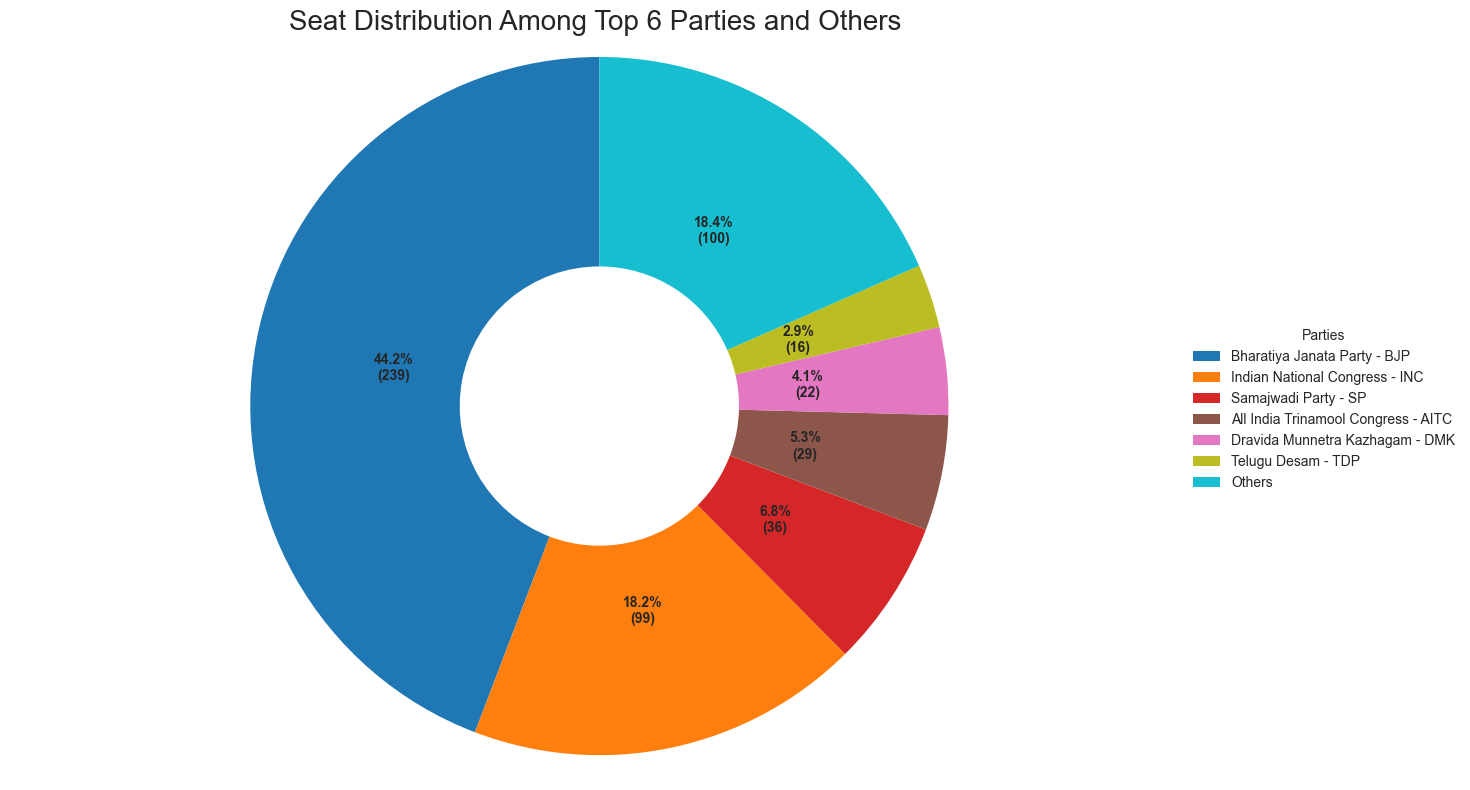

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming we have the DataFrame 'df' with columns: 'Party', 'Won', 'Leading', 'Total'

# Sort the DataFrame by Total seats in descending order
df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)

# Separate top 6 parties and sum the rest
top_6 = df_sorted.head(6)
others = pd.DataFrame({
    'Party': ['Others'],
    'Total': [df_sorted.iloc[6:]['Total'].sum()]
})

# Combine top 6 and others
pie_data = pd.concat([top_6, others]).reset_index(drop=True)

# Set up the plotting style
plt.style.use('seaborn-darkgrid')

# Create a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(pie_data)))
custom_palette = sns.color_palette(colors)

# Increase the figure size
plt.figure(figsize=[12, 8])

# Create the pie chart
wedges, texts, autotexts = plt.pie(pie_data['Total'], 
                                   labels=None,  # Remove labels
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(pie_data["Total"]))})' if pct > 2 else '',
                                   startangle=90, 
                                   colors=custom_palette,
                                   wedgeprops=dict(width=0.6))  # Donut chart

plt.title('Seat Distribution Among Top 6 Parties and Others', fontsize=20)

# Set properties of text inside the pie chart
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

# Add legend outside the pie chart
plt.legend(wedges, pie_data['Party'],
           title="Parties",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()
